In [126]:
#!pip install bs4

# Import necessary libraries

In [219]:
import requests
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
from lyricsgenius import Genius
import multidict as multidict
from bs4 import BeautifulSoup

# Defining my functions

In [129]:
def read_website():
    # Webscraping for a list of songs
    # Url to scrape
    url = "https://digitaldreamdoor.com/pages/best_songsddd.html"
    # Get the html code
    r = requests.get(url)
    html = r.content
    soup = BeautifulSoup(html)
    soup

    # Cleaning the soup into a pandas data frame

    songs = soup.find("div", class_ = "list", recursive=True ).text.strip()
    songs = songs.replace("\xa0", "")
    songs = re.sub(r"[0-9]+. ","",songs)
    songlist = songs.split("\n")
    df = pd.DataFrame(songlist)
    new = df[0].str.split("-", n = 1, expand=True)
    df["song"] = new[0]
    df["artist"] = new[1]
    df.drop(columns = 0, axis = 1, inplace=True)
    return df

In [220]:
# Set key for the Genius API
def the_key():
    key = "8ZwQoPwgcnPIPuHJjWgBZppXvXZ0zbaT_bpQn2qL9hkzLJDU9BHrHD2a3NpIISi-"
    return key

In [139]:

# Get the lyrics for each song
def songlist(key, df):
    work_text = ""
    genius = Genius(key)
    for i in df.index:
        print(df.iloc[i][0], df.iloc[i][1] )
        genius.response_format = 'plain'
        the_song = df.iloc[i][0]
        the_artist = df.iloc[i][1]
        retries = 0
        genius.timeout = 15
    
        while retries < 3:
            try:
                song = genius.search_song(the_song, the_artist)
            except Timeout as e:
                retries += 1
                continue
            if song is not None:
                work_text += song.lyrics
            break

        print(i)
    print("All songs loaded")
    return work_text

In [221]:
# Set words that should not be in the final wordcloud, like music terms or artist names.
def unallowed_words():
    artists = df.artist.to_string()
    artists = artists.lower()
    artists = artists.split()
    
    music_word_lst = ["there","lyrics", "chorus", "verse", "guitar", "solo", "outro", "bridge", "instrumental", "intro", "break","71Embed","to", "a", "and","don't", "can't",artists]
    del_word_lst = music_word_lst + artists
    #"beatles","elvis","presley","hendrix","mccartney","clearwater"]
    return del_word_lst

In [222]:
# Takes all the lyrics and count each word.
def list_words(texten):
    texten = texten.replace("embed", " ")
    texten = re.sub("[^A-Za-z]", " ", texten)
    lst = texten.split()
    word_count = {}
    for word in lst:
        if  len(word) > 4 and word.lower() not in unallowed_words():
            if word.lower() in word_count:
                word_count[word.lower()] += 1
            else:
                word_count[word.lower()] = 1

 
    new_list = sorted(word_count.items(), key=lambda x: x[1], reverse=True)

    for i in new_list:
        print(i[0], i[1])
    
    return word_count

In [225]:

def gen_wordcloud(word_count):
# Generates a wordcloud based on the most frequent words in the lyrics

    plt.figure(figsize = (20,15), frameon=False)

    wordcloud = WordCloud(font_path = "C:\Windows\Fonts\ALGER.TTF",
                          width=1000, 
                          height=1000, 
                          margin=1, 
                          repeat = False, 
                          min_font_size = 10 ,
                          background_color ='black', 
                          colormap="cool"
                         ).generate_from_frequencies(word_count)
    # Display the generated image:

    plt.imshow(wordcloud, interpolation='bilinear')

    plt.axis("off")
    plt.margins(x=0, y=0)
    plt.show()

# Start

Respect   Aretha Franklin
Searching for "Respect " by  Aretha Franklin...
Done.
0
Johnny B. Goode   Chuck Berry
Searching for "Johnny B. Goode " by  Chuck Berry...
Done.
1
Stairway to Heaven   Led Zeppelin
Searching for "Stairway to Heaven " by  Led Zeppelin...
Done.
2
Louie Louie   The Kingsmen
Searching for "Louie Louie " by  The Kingsmen...
Done.
3
I Heard It Through The Grapevine   Marvin Gaye
Searching for "I Heard It Through The Grapevine " by  Marvin Gaye...
Done.
4
(I Can't Get No) Satisfaction   Rolling Stones
Searching for "(I Can't Get No) Satisfaction " by  Rolling Stones...
Done.
5
Jailhouse Rock   Elvis Presley
Searching for "Jailhouse Rock " by  Elvis Presley...
Done.
6
Rock Around The Clock   Bill Haley & His Comets
Searching for "Rock Around The Clock " by  Bill Haley & His Comets...
Done.
7
Billie Jean   Michael Jackson
Searching for "Billie Jean " by  Michael Jackson...
Done.
8
Like A Rolling Stone   Bob Dylan
Searching for "Like A Rolling Stone " by  Bob Dylan...
Do

Done.
82
I Love Rock 'N' Roll   Joan Jett & The Blackhearts
Searching for "I Love Rock 'N' Roll " by  Joan Jett & The Blackhearts...
Done.
83
Don't You Want Me?   Human League
Searching for "Don't You Want Me? " by  Human League...
Done.
84
Jeremy   Pearl Jam
Searching for "Jeremy " by  Pearl Jam...
Done.
85
Heartbreak Hotel   Elvis Presley
Searching for "Heartbreak Hotel " by  Elvis Presley...
Done.
86
Like a Virgin   Madonna
Searching for "Like a Virgin " by  Madonna...
Done.
87
Beat It   Michael Jackson
Searching for "Beat It " by  Michael Jackson...
Done.
88
Sweet Child O' Mine   Guns N' Roses
Searching for "Sweet Child O' Mine " by  Guns N' Roses...
Done.
89
Under the Bridge   Red Hot Chili Peppers
Searching for "Under the Bridge " by  Red Hot Chili Peppers...
Done.
90
Your Song   Elton John
Searching for "Your Song " by  Elton John...
Done.
91
You Shook Me All Night Long   AC/DC
Searching for "You Shook Me All Night Long " by  AC/DC...
Done.
92
The Sounds Of Silence   Simon & Gar

corridor 1
tiffany 1
twisted 1
mercedes 1
bends 1
callin 1
champagne 1
prisoners 1
device 1
chambers 1
gathered 1
feast 1
steely 1
knives 1
passage 1
relax 1
programmed 1
receive 1
fingertips 1
starting 1
criticize 1
riches 1
embedimagine 1
countries 1
possessions 1
greed 1
hunger 1
brotherhood 1
sharing 1
onerelated 1
songscrippled 1
insidejohn 1
lennonbeautiful 1
lennonrunning 1
solid 1
escalate 1
conquer 1
meantime 1
thinks 1
judge 1
simply 1
embedsmells 1
bored 1
assured 1
dirty 1
blessed 1
embedhound 1
embedborn 1
lyricsin 1
mansions 1
glory 1
machines 1
sprung 1
cages 1
wheeled 1
injected 1
steppin 1
death 1
guard 1
strap 1
engines 1
rider 1
palace 1
powered 1
drones 1
rearview 1
amusement 1
rises 1
stark 1
huddled 1
everlasting 1
highways 1
jammed 1
sadness 1
madness 1
embedlight 1
embedsuperstition 1
ladder 1
daydream 1
embedlayla 1
opening 1
hiding 1
foolish 1
consolation 1
upside 1
situation 1
embedbohemian 1
fantasy 1
landslide 1
escape 1
reality 1
killed 1
trigger 1
thrown 

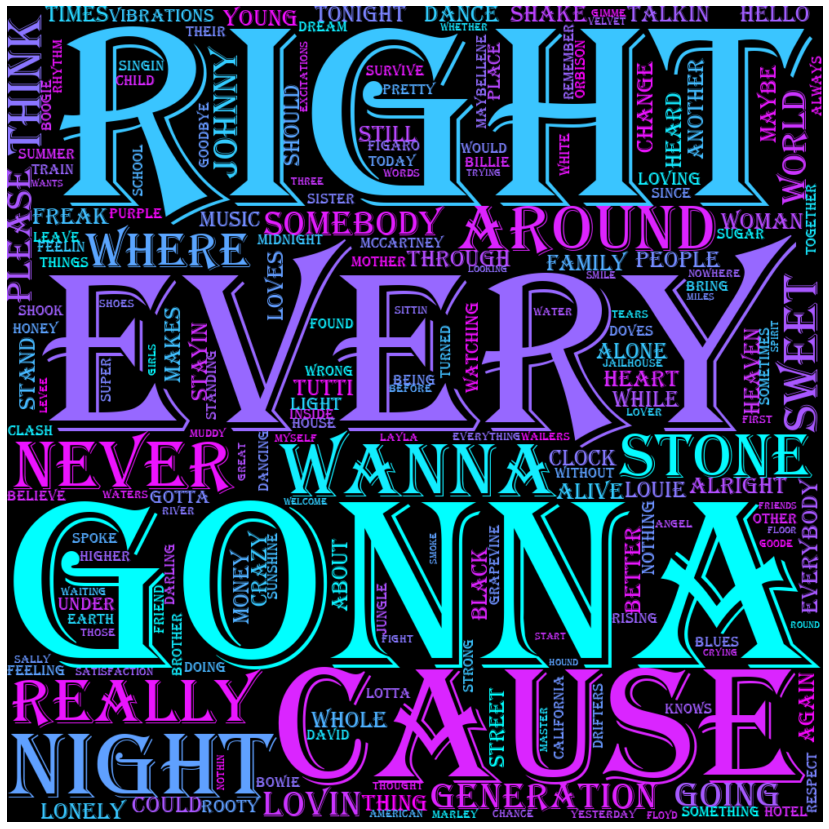

In [226]:

pd.options.display.max_rows = 999

df = read_website()
key = the_key()
texten = songlist(key, df)

#Generate wordcloud
word_count = list_words(texten)
gen_wordcloud(word_count)